In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
train_df = pd.read_csv('train.csv')
train_df.drop(labels='id', axis=1, inplace=True)
train_df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [36]:
test_df = pd.read_csv('test.csv')
test_df.drop(labels='id', axis=1, inplace=True)
test_df.head()

,comment_text
0,Yo bitch Ja Rule is more succesful then you'll...
1,== From RfC == \n\n The title is fine as it is...
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,":If you have a look back at the source, the in..."
4,I don't anonymously edit articles at all.


In [8]:
test_labels = pd.read_csv('test_labels.csv')
test_labels.sample(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
146464,f4cd98e5420f2a2a,-1,-1,-1,-1,-1,-1
139872,e9db877bfff13c37,-1,-1,-1,-1,-1,-1
93765,9c663c633cf56caa,-1,-1,-1,-1,-1,-1
93131,9b599aaed6cb4e0e,-1,-1,-1,-1,-1,-1
136540,e42ff931d2fe14d1,0,0,0,0,0,0
144688,f1de7f28771c0cb3,-1,-1,-1,-1,-1,-1
75776,7e48cf735173ceed,-1,-1,-1,-1,-1,-1
139588,e967a35a2ff191e2,-1,-1,-1,-1,-1,-1
90833,9777a6526bc1216c,-1,-1,-1,-1,-1,-1
123175,cda6d7b1b1e9094b,-1,-1,-1,-1,-1,-1


## Number of comments in each category

In [9]:
df_toxicity = train_df.drop('comment_text', axis=1)
categories = list(df_toxicity.columns.values)
counts = []
for i in categories:
    counts.append((i, df_toxicity[i].sum()))
    
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


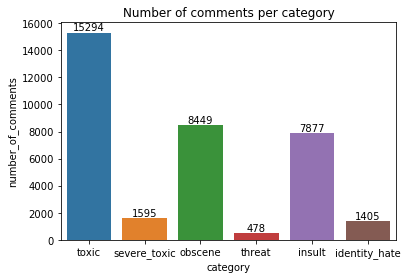

In [70]:
ax = sns.barplot(x='category', y='number_of_comments', data=df_stats)
plt.title("Number of comments per category")

# adding the text labels
rects = ax.patches
labels = df_stats.number_of_comments

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height+5, label, ha='center', va='bottom')

plt.show()

## How many comments hasve multi-labels?

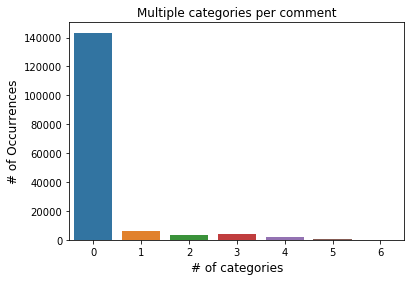

In [18]:
row_sums = train_df.iloc[:,1:].sum(axis=1)
x= row_sums.value_counts()

sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)
plt.show()

In [19]:
print('Percentage of comments that are not labelled:')
print(len(df[(df['toxic']==0) & (df['severe_toxic']==0) & (df['obscene']==0) 
             & (df['threat']== 0) & (df['insult']==0) & (df['identity_hate']==0)]) / len(df))

Percentage of comments that are not labelled:
0.8983211235124177


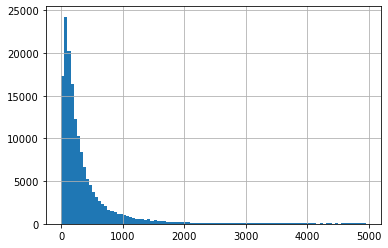

In [22]:
# The distribution of the number of words in comment texts
comment_lengths = df.comment_text.str.len()
comment_lengths.hist(bins=np.arange(0,5000,50))

In [24]:
# missing comment
train_df['comment_text'].isnull().sum()

0

In [25]:
train_df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

## Text Cleaning

In [26]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r"\'s", ' ', text)
    text = re.sub(r"weren't", 'were not', text)
    text = re.sub(r"don't", 'do not', text)
    text = re.sub(r"\'ve", ' have ', text)
    text = re.sub(r"can't", 'can not', text)
    text = re.sub(r"n't", ' not ', text)
    text = re.sub(r"i'm", 'i am', text)
    text = re.sub(r"\'re", ' are ', text)
    text = re.sub(r"\'d", ' would ', text)
    text = re.sub(r"\'ll", ' will ', text)
    text = re.sub(r"\'scuse", ' excuse ', text)
    text = re.sub(r"\W", ' ', text)
    text = re.sub(r"\s+", ' ', text)
    text = text.strip(' ')
    return text

In [27]:
train_df['comment_text'] = train_df['comment_text'].map(lambda com: clean_text(com))
train_df['comment_text'][10]

'fair use rationale for image wonju jpg thanks for uploading image wonju jpg i notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in wikipedia articles constitutes fair use in addition to the boilerplate fair use template you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use please go to the image description page and edit it to include a fair use rationale if you have uploaded other fair use media consider checking that you have specified the fair use rationale on those pages too you can find a list of image pages you have edited by clicking on the my contributions link it is located at the very top of any wikipedia page when you are logged in and then selecting image from the dropdown box note that any fair use images uploaded after 4 may 2006 and lacking such an explanation will be deleted one wee

In [28]:
from sklearn.model_selection import train_test_split

categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

train, test = train_test_split(train_df, test_size=0.3, random_state=0, shuffle=True)

X_train, X_test = train.comment_text, test.comment_text

print(X_train.shape)
print(X_test.shape)

(111699,)
(47872,)


## OneVsRest multi-label strategy
The Multi-label algorithm accepts a binary mask over multiple labels. The result for each prediction will be an array of 0s and 1s marking which class labels apply to each row input sample.

## Naive Bayes
OneVsRest strategy can be used for multi-label learning, where a classifier is used to predict multiple labels for instance. Naive Bayes supports multi-class, but we are in a multi-label scenario, therefore, we wrap Naive Bayes in the OneVsRestClassifier.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [45]:
vectorizer = TfidfVectorizer(stop_words=stop_words)

train_term_doc = vectorizer.fit_transform(X_train)
test_term_doc = vectorizer.transform(X_test)

In [46]:
NB_pipeline = OneVsRestClassifier(MultinomialNB(fit_prior=True, class_prior=None))

In [48]:
from sklearn.metrics import accuracy_score, f1_score

for category in categories:
    print(f"...Processing {category}")
    NB_pipeline.fit(train_term_doc, train[category])
    prediction = NB_pipeline.predict(test_term_doc)
    accuracy = accuracy_score(test[category], prediction)
    #fscore = f1_score(test[category], prediction)
    print(f"Accuracy score is {accuracy}")
    #print(f"F1 score is {fscore}")

...Processing toxic
Accuracy score is 0.9206843248663101
...Processing severe_toxic
Accuracy score is 0.9898479278074866
...Processing obscene
Accuracy score is 0.9532503342245989
...Processing threat
Accuracy score is 0.9972844251336899
...Processing insult
Accuracy score is 0.9526654411764706
...Processing identity_hate
Accuracy score is 0.9909968248663101


In [49]:
SVC_pipeline = OneVsRestClassifier(LinearSVC())

In [50]:
for category in categories:
    print(f"...Processing {category}")
    SVC_pipeline.fit(train_term_doc, train[category])
    prediction = SVC_pipeline.predict(test_term_doc)
    accuracy = accuracy_score(test[category], prediction)
    #fscore = f1_score(test[category], prediction)
    print(f"Accuracy score is {round(accuracy,2)}")
    #print(f"F1 score is {fscore}")

...Processing toxic
Accuracy score is 0.96
...Processing severe_toxic
Accuracy score is 0.99
...Processing obscene
Accuracy score is 0.98
...Processing threat
Accuracy score is 1.0
...Processing insult
Accuracy score is 0.97
...Processing identity_hate
Accuracy score is 0.99


In [51]:
LogReg_pipeline = OneVsRestClassifier(LogisticRegression(solver='sag'))

In [52]:
for category in categories:
    print(f"...Processing {category}")
    LogReg_pipeline.fit(train_term_doc, train[category])
    prediction = LogReg_pipeline.predict(test_term_doc)
    accuracy = accuracy_score(test[category], prediction)
    #fscore = f1_score(test[category], prediction)
    print(f"Accuracy score is {round(accuracy,2)}")
    #print(f"F1 score is {fscore}")

...Processing toxic
Accuracy score is 0.96
...Processing severe_toxic
Accuracy score is 0.99
...Processing obscene
Accuracy score is 0.98
...Processing threat
Accuracy score is 1.0
...Processing insult
Accuracy score is 0.97
...Processing identity_hate
Accuracy score is 0.99


In [37]:
test_df['comment_text'] = test_df['comment_text'].map(lambda com: clean_text(com))
test_df['comment_text'][10]

'i think its crap that the link to roggenbier is to this article somebody that knows how to do things should change it'

In [53]:
test_data = vectorizer.transform(test_df['comment_text'])

In [54]:
prediction_on_test = LogReg_pipeline.predict(test_data)

In [55]:
prediction_on_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [57]:
test_data.shape

(153164, 153271)

In [58]:
len(prediction_on_test)

153164

In [59]:
test_df.shape

(153164, 1)

In [60]:
result_df = pd.concat([test_df, prediction_on_test], axis=1)

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [61]:
type(test_df)

pandas.core.frame.DataFrame

In [62]:
type(prediction_on_test)

numpy.ndarray

In [63]:
test_df['predictions'] = prediction_on_test

In [64]:
test_df.head()

,comment_text,predictions
0,yo bitch ja rule is more succesful then you wi...,0
1,from rfc the title is fine as it is imo,0
2,sources zawe ashton on lapland,0
3,if you have a look back at the source the info...,0
4,i do not anonymously edit articles at all,0


In [65]:
test_df['predictions'].value_counts()

0    152431
1       733
Name: predictions, dtype: int64

In [80]:
import codecs
# Generate the Mask for EAP
#f1 = open("death.png", "wb")
#f1.write(codecs.decode(death_64,'base64'))
#f1.close()
#img1 = imread("death.png")
# img = img.resize((980,1080))
#deathmask = img1

deathmask = np.array(Image.open("Death (2).png"))

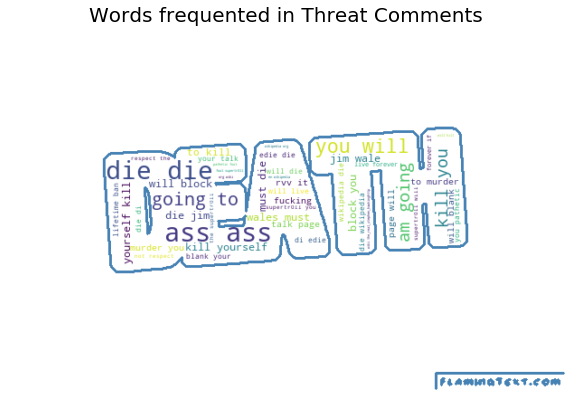

In [85]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

#clean_mask=np.array(Image.open("../input/imagesforkernal/safe-zone.png"))
#clean_mask=clean_mask[:,:,1]
#wordcloud for clean comments
subset=train_df[train_df.threat==True]
text=subset.comment_text.values
stopword = set(STOPWORDS)
wc= WordCloud(background_color="white",mask=deathmask, max_words=2000,
              contour_width=3,
              contour_color='steelblue',stopwords=stopword).generate(" ".join(text))
#wc.generate(" ".join(text))
plt.figure(figsize=(10,10))
plt.axis("off")
plt.title("Words frequented in Threat Comments", fontsize=20)
plt.imshow(wc, interpolation='bilinear')
#plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17), alpha=0.98)
plt.show()